# Gender Bias in Autocomplete AI

The AI at hand is to predict next words based on what users have typed. It's pretty much how autocomplete in Google search works. Let's try to make the autocomplete algorithm less biased toward a certain gender.

The code learns from an existing corpora (text-based dataset), and performs autocomplete when receiving a word input by a user.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
import pandas as pd
import collections

## Training with Bias

In [10]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# dataset = pd.read_csv("/content/drive/My Drive/Autocomplete/Autocomplete Dataset - Biased.csv")
# dataset["Comments"] = dataset["Comments"].str.replace('\r\n', '')
# text_list = dataset["Comments"].tolist()
# text = ' '.join(text_list)

with open('/content/drive/My Drive/Autocomplete/autocomplete.txt', 'r', encoding = "utf8") as f:
    text = f.read()

# Preprocess the text
tokens = preprocess(text)

# larger range
def train_model(tokens):
    model = collections.defaultdict(list)
    for i in range(len(tokens)-1):
        key = tokens[i]
        values = tokens[i-2:i] + tokens[i+1:i+3]
        model[key].extend(values)
    return model

# Train the model
model = train_model(tokens)

import random

def generate_prediction(model, prefix):
    if prefix in model:
        suffixes = model[prefix]
        return random.choice(suffixes)
    else:
        return None

def check_adjective(word):
    tagged_word = nltk.pos_tag([word])
    pos = tagged_word[0][1]
    return pos.startswith('JJ')

# Take input from user
input_str = input("Enter word: ")
output_num = input("How many words do you want to generate: ")

# Preprocess the input
input_tokens = preprocess(input_str)

# Generate prediction
count = 0
while count < int(output_num):
    new_word = generate_prediction(model, input_tokens[-1])
    if new_word != "women" and new_word != "men" and check_adjective(new_word):
      count += 1
      input_tokens.append(new_word)

# Print the prediction
if input_tokens:
    print("Next word prediction:", input_tokens[1:])
else:
    print("No prediction found.")

Enter word: men
How many words do you want to generate: 5
Next word prediction: ['logical', 'analytical', 'logical', 'rational', 'logical']


### Inspect the Dataset

In [11]:
male_part = dataset[dataset["First Word"] == "Men"]
male_part.reset_index()
female_part = dataset[dataset["First Word"] == "Women"]
female_part.reset_index();

NameError: ignored

In [ ]:
def calculate_token_frequencies(dataset):
    frequency_dict = {}

    for text in dataset.Comments.tolist():
        tokens = text.split()
        for token in tokens:
            if check_adjective(token):
              if token in frequency_dict:
                frequency_dict[token] += 1
              else:
                frequency_dict[token] = 1

    return sorted(frequency_dict.items(), key = lambda item: item[1], reverse = True)

In [ ]:
male_all = calculate_token_frequencies(male_part)
male_top_5 = calculate_token_frequencies(male_part)[:5]
print(male_top_5)

[('inclined', 4), ('interested', 3), ('financial', 2), ('capable', 2), ('logical', 2)]


In [ ]:
female_all = calculate_token_frequencies(female_part)
female_top_5 = calculate_token_frequencies(female_part)[:5]
print(female_top_5)

[('emotional', 3), ('inclined', 3), ('likely', 3), ('harmonious', 3), ('natural', 2)]


In [ ]:
import matplotlib.pyplot as plt

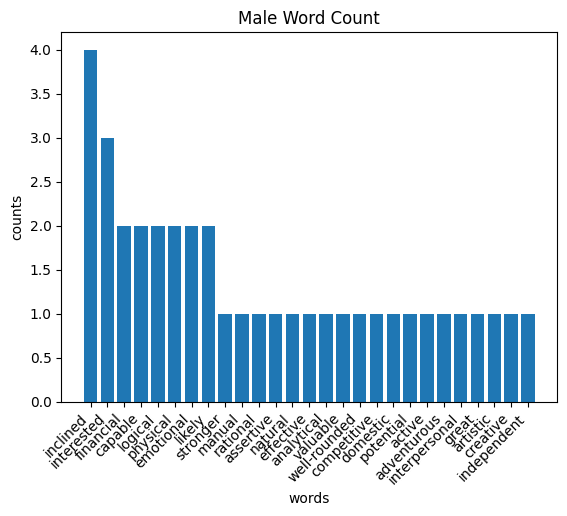

<Figure size 2000x900 with 0 Axes>

In [ ]:
male_words, male_counts = [pair[0] for pair in male_all], [pair[1] for pair in male_all]
plt.bar(male_words, male_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel("words")
plt.ylabel("counts")
plt.title("Male Word Count")
plt.tight_layout()
plt.show();

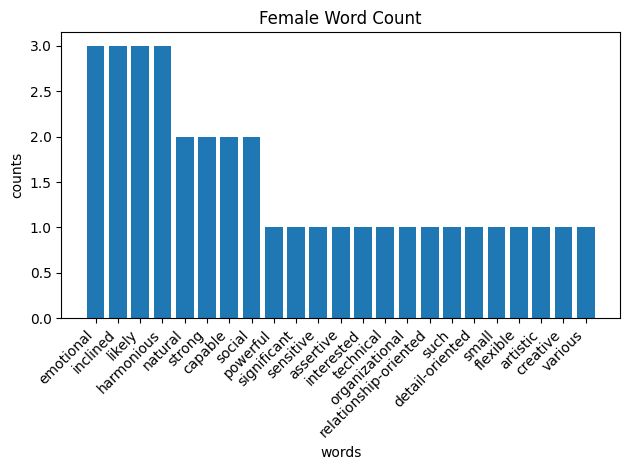

In [ ]:
female_words, female_counts = [pair[0] for pair in female_all], [pair[1] for pair in female_all]
plt.bar(female_words, female_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel("words")
plt.ylabel("counts")
plt.title("Female Word Count")
plt.tight_layout()
plt.show();

### Next Step